<a href="https://colab.research.google.com/github/anasalek/Pyhton_hw/blob/main/Word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обучение модели Word2Vec

## Загрузка корпуса (роман "Child Christopher and Goldilind the Fair", William Morris)

In [ ]:
with open('Child_Christopher.txt', 'r', encoding='utf-8') as f:
    data = f.read()

data[:200]

'\ufeffThe Project Gutenberg eBook of Child Christopher and Goldilind the Fair\n    \nThis ebook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with al'

## Предобработка

In [ ]:
import re

def clean_text(text: str):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub('\s+', ' ', text).strip()
    return text

clean_data = clean_text(data)
(clean_data)



'the project gutenberg ebook of child christopher and goldilind the fair this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no restrictions whatsoever you may copy it give it away or reuse it under the terms of the project gutenberg license included with this ebook or online at wwwgutenbergorg if you are not located in the united states you will have to check the laws of the country where you are located before using this ebook title child christopher and goldilind the fair author william morris release date july ebook language english credits produced by john hamm and david widger start of the project gutenberg ebook child christopher and goldilind the fair produced by john hamm child christopher and goldilind the fair by william morris chapter i of the king of oakenrealm and his wife and his child of old there was a land which was so much a woodland that a minstrel thereof said it that a squirrel might go fro

Текст архаичный, поэтому пришлось и стоп-слова удалить, и конкретные части речи указать, и все равно свои добавить

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
stop_words = ['thou', 'thy', 'thee', 'till', 'yea', 'nay', 'somewhat', 'shall']
doc = nlp(clean_data)
doc = [token.text for token in doc if not token.is_stop and not token.pos_ is {'ADP', 'CCONJ', 'SCONJ', 'PART', 'AUX', 'NUM', 'PRON', 'ADV'} and token.text.lower() not in stop_words]
doc[10:20]

['states',
 'parts',
 'world',
 'cost',
 'restrictions',
 'whatsoever',
 'copy',
 'away',
 'reuse',
 'terms']

## Обучение

In [ ]:
!pip install numpy==1.23.5 gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, b

In [ ]:
from gensim.models import Word2Vec

w2v_model = Word2Vec(
    min_count=10,
    window=2,
    #size=300,
    negative=10,
    alpha=0.03,
    min_alpha=0.0007,
    sample=6e-5,
    sg=1)

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=[doc], vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
model.wv['man']

array([-0.0163575 ,  0.02378548,  0.00560938,  0.00249852,  0.01528983,
       -0.0259493 ,  0.01035864,  0.03244179, -0.0059325 , -0.01819701,
       -0.00135756, -0.01578291,  0.00213129,  0.00057181,  0.01136533,
       -0.02141068,  0.01161853, -0.02325803, -0.0092765 , -0.01764107,
        0.00609863,  0.00840505,  0.01422547,  0.00021816, -0.01298312,
        0.00523517, -0.00302923, -0.00088412, -0.01282325, -0.0009722 ,
        0.00940211, -0.00762576, -0.00931896, -0.01038047,  0.00052194,
        0.01972032,  0.01216022, -0.02217647, -0.02040957, -0.01736093,
       -0.0013607 , -0.01130085, -0.00606627, -0.0042825 ,  0.02351443,
       -0.00278078, -0.00800057, -0.00176013, -0.0006944 ,  0.00137679,
        0.00539211, -0.00545745, -0.0136415 , -0.0094101 , -0.00912947,
        0.00092388,  0.01136533,  0.00947735, -0.01067358, -0.00064022,
       -0.00308322,  0.00712773, -0.00407436, -0.00430654, -0.01041906,
        0.00680475, -0.00044094,  0.02266939, -0.02230271,  0.01

In [ ]:
model.wv.most_similar(['goldilind']) # слова для прекарсной Голдилинд

[('said', 0.9217603802680969),
 ('earl', 0.8961542248725891),
 ('went', 0.8939650654792786),
 ('great', 0.8822581171989441),
 ('spake', 0.8803736567497253),
 ('therewith', 0.8791177272796631),
 ('tell', 0.8781203627586365),
 ('little', 0.8750694394111633),
 ('hand', 0.8669367432594299),
 ('christopher', 0.8650967478752136)]

In [ ]:
print(model.wv.similarity('christopher', 'brave')) # совсем не храбрый
print(model.wv.similarity('christopher', 'strong'))
print(model.wv.similarity('christopher', 'fair')) # больше красивый, чем сильный, ок
print(model.wv.similarity('goldilind', 'fair')) # Кристофер красивее, все ясно
print(model.wv.similarity('christopher', 'wise'))
print(model.wv.similarity('goldilind', 'wise'))

-0.04985217
0.40591365
0.89564055
0.86292756
0.7505227
0.7024638


In [ ]:
model.wv.doesnt_match(['christopher', 'child', 'man']) # да ладно? ну в книге child это как недорыцарь, а не ребенок

'child'

## Визуализация


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

from sklearn.decomposition import PCA

In [ ]:
def pca_scatterplot(model, words=None, sample=0):
  word_vectors = [model.wv[w] for w in words]
  # сократить размерность векторов до 2D
  vectors_2d = PCA().fit_transform(word_vectors)
  # отрисовка изображения, задаем размер 12 на 10
  plt.figure(figsize=(12,10))
  # задаем цвет точек и ссылаемся на данные по осям x (0) и y (1)
  plt.scatter(vectors_2d[:,0], vectors_2d[:,1], c='r')
  # добавляем подписи к данным, проходимся по списку слов
  for i, word in enumerate(words):
    # соотносим слово с его двухмерным вектором
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))

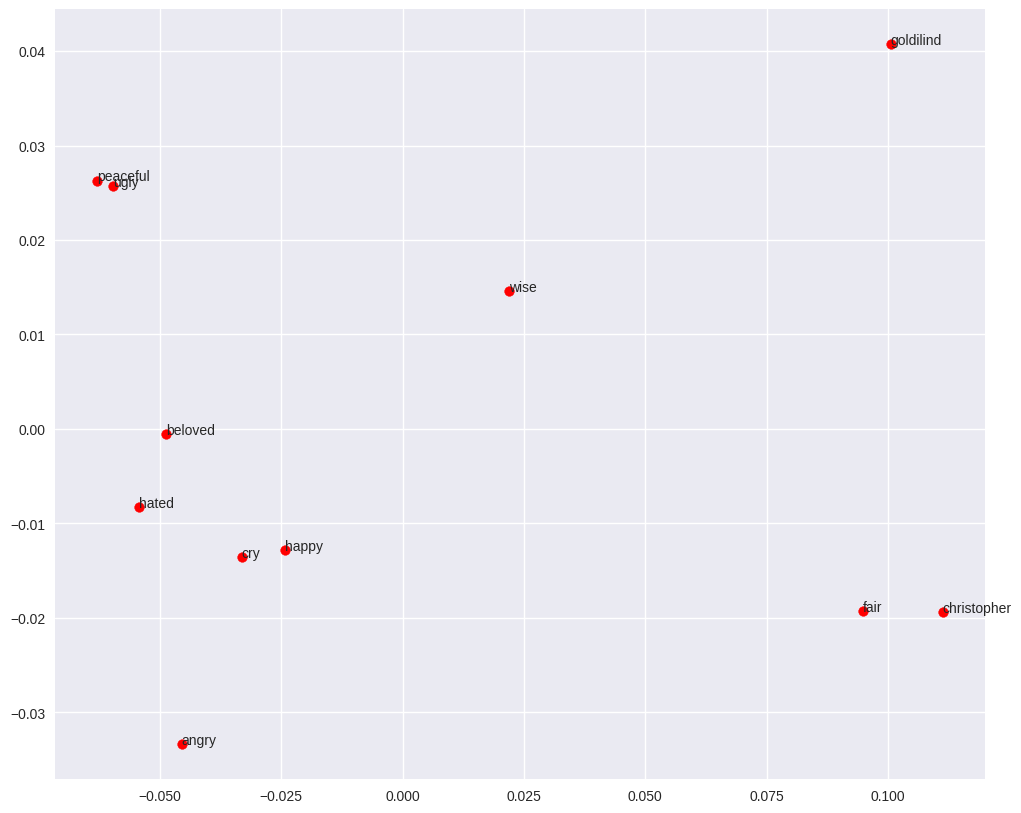

In [ ]:
pca_scatterplot(model, ['goldilind', 'christopher', 'wise', 'happy', 'cry', 'hated', 'ugly', 'angry', 'fair', 'beloved', 'peaceful'])

Тут я пыталась автоматизировать свое исследование еще с бакалавриата, когда я искала в этом романе архаизмы вручную... Просто отобрать слова, которых нет в списке современных слов, потому что специальных списков архаизмов я не нашла.

In [ ]:
import nltk
from nltk.corpus import wordnet
nltk.download('wordnet')
modern_words = set(wordnet.words())

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from nltk.stem import SnowballStemmer
snowball = SnowballStemmer(language="english")
archaic = []
for word in doc:
  if word not in modern_words:
    archaic.append(word)

In [ ]:
# ну попали, конечно, имена собственные, ebook и все, что склоняется. так себе, но список уменьшился. Щас с таким заданием любая нейронка справится, конечно, но без нее, хз,
# загрузить список неправильных глаголов, убрать имена собственные легко, формы 3 лица и регулярное прошедшее время регулярками + список современных глаголов, чтобы архаизмы в
# в этих формах не удалились
len(archaic)

str_arc = ', '.join(archaic)
print(str_arc)

ebook, goldilind, ebook, states, restrictions, ebook, wwwgutenbergorg, states, ebook, goldilind, william, ebook, produced, hamm, widger, ebook, goldilind, produced, hamm, goldilind, william, oakenrealm, called, oakenrealm, took, tourneys, came, vanquished, bewrayed, gave, havings, conquered, brought, oakenrealm, tells, rued, wore, desport, wore, went, betid, kings, marched, oakenrealm, lords, thanes, cried, behoved, tokens, hosting, went, foemen, dragged, amidst, ravagers, followed, fleers, reached, hawberk, stood, unmighty, lords, chieftains, strove, knew, departing, fathers, ought, edges, hilts, unto, lords, swore, lords, stood, houselled, followed, fleeing, battles, fought, went, kings, oakenham, bemoaned, kings, came, oakenrealm, took, childing, manbairn, died, lived, borne, summoned, mothers, called, told, mans, worthier, folkmote, called, hight, oakenrealm, befriended, feared, friends, knew, bailiffs, sheriffs, throve, lacked, kings, kings, kings, seen, nurses, healths, called, r

In [ ]:
len(modern_words)

147306